In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
transactions = pd.read_csv('transactions.csv') 

In [3]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,5/21/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,10/16/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,8/31/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,10/1/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,6/24/17,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0
19996,19997,41,127,11/9/17,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0
19997,19998,87,2284,4/14/17,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0
19998,19999,6,2764,7/3/17,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [5]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [6]:
transactions.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


In [7]:
transactions.corr()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
transaction_id,1.000000,-0.011486,0.001753,-0.006154,0.004835
product_id,-0.011486,1.000000,0.004278,0.090066,-0.052961
customer_id,0.001753,0.004278,1.000000,0.009306,-0.001521
list_price,-0.006154,0.090066,0.009306,1.000000,0.059367
product_first_sold_date,0.004835,-0.052961,-0.001521,0.059367,1.000000


In [8]:
transactions.cov()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
transaction_id,3.333500e+07,-2039.455748,1.024228e+04,-20708.712943,8.029532e+04
product_id,-2.039456e+03,945.783270,1.331277e+02,1614.346379,-4.654963e+03
customer_id,1.024228e+04,133.127684,1.024045e+06,5488.308117,-4.424897e+03
list_price,-2.070871e+04,1614.346379,5.488308e+03,339685.263157,9.947400e+04
product_first_sold_date,8.029532e+04,-4654.962856,-4.424897e+03,99474.003051,8.266781e+06


In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [10]:
transactions['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [11]:
transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [12]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [13]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [14]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [15]:
transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [16]:
transactions['customer_id'].value_counts()

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64

In [17]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [18]:
df = transactions.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  object 
 12  product_first_sold_date  19445 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.1+ MB


In [20]:
df.cov()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
transaction_id,3.340457e+07,-2055.547041,1.625202e+04,-21521.358889,7.304393e+04
product_id,-2.055547e+03,934.646961,1.042161e+02,1604.691334,-4.764974e+03
customer_id,1.625202e+04,104.216095,1.023920e+06,6880.888749,-6.714560e+03
list_price,-2.152136e+04,1604.691334,6.880889e+03,339495.471923,9.921499e+04
product_first_sold_date,7.304393e+04,-4764.973731,-6.714560e+03,99214.987844,8.283275e+06


In [21]:
df.corr()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
transaction_id,1.000000,-0.011633,0.002779,-0.006391,0.004391
product_id,-0.011633,1.000000,0.003369,0.090085,-0.054155
customer_id,0.002779,0.003369,1.000000,0.011671,-0.002306
list_price,-0.006391,0.090085,0.011671,1.000000,0.059164
product_first_sold_date,0.004391,-0.054155,-0.002306,0.059164,1.000000


In [22]:
# data for
# online_order
# order_status
# brand
# product_line
# product_class
# product_size


In [23]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,5/21/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,10/16/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,8/31/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,10/1/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [24]:
df["online_order"] = df["online_order"].astype("category").cat.codes

In [26]:
df["order_status"] = df["order_status"].astype("category").cat.codes

In [27]:
df["brand"] = df["brand"].astype("category").cat.codes

In [28]:
df["product_line"] = df["product_line"].astype("category").cat.codes

In [29]:
df["product_class"] = df["product_class"].astype("category").cat.codes

In [30]:
df["product_size"] = df["product_size"].astype("category").cat.codes

In [31]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/17,0,0,3,2,2,1,71.49,$53.62,41245.0
1,2,3,3120,5/21/17,1,0,4,2,2,0,2091.47,$388.92,41701.0
2,3,37,402,10/16/17,0,0,2,2,1,1,1793.43,$248.82,36361.0
3,4,88,3135,8/31/17,0,0,1,2,2,1,1198.46,$381.10,36145.0
4,5,78,787,10/1/17,1,0,0,2,2,0,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,6/24/17,1,0,2,2,0,1,2005.66,"$1,203.40",37823.0
19996,19997,41,127,11/9/17,1,0,3,1,2,1,416.98,$312.74,35560.0
19997,19998,87,2284,4/14/17,1,0,2,2,2,1,1636.90,$44.71,40410.0
19998,19999,6,2764,7/3/17,0,0,2,2,0,1,227.88,$136.73,38216.0


In [32]:
df.corr()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date
transaction_id,1.000000,-0.011633,0.002779,0.001693,-0.010121,0.010935,-0.001814,-0.007154,-0.002507,-0.006391,0.004391
product_id,-0.011633,1.000000,0.003369,-0.005471,0.007236,-0.001761,0.131254,0.068301,-0.086014,0.090085,-0.054155
customer_id,0.002779,0.003369,1.000000,0.003215,-0.000821,-0.006775,-0.009402,-0.002411,-0.007170,0.011671,-0.002306
online_order,0.001693,-0.005471,0.003215,1.000000,0.011923,-0.006177,-0.006316,-0.018633,0.010397,-0.000927,0.000902
order_status,-0.010121,0.007236,-0.000821,0.011923,1.000000,0.003865,-0.000870,-0.005970,-0.001013,0.004996,-0.005966
brand,0.010935,-0.001761,-0.006775,-0.006177,0.003865,1.000000,0.119071,0.188838,-0.014845,0.078194,-0.013414
product_line,-0.001814,0.131254,-0.009402,-0.006316,-0.000870,0.119071,1.000000,0.060073,-0.201128,0.214501,-0.009233
product_class,-0.007154,0.068301,-0.002411,-0.018633,-0.005970,0.188838,0.060073,1.000000,-0.097063,0.074661,0.001593
product_size,-0.002507,-0.086014,-0.007170,0.010397,-0.001013,-0.014845,-0.201128,-0.097063,1.000000,-0.144009,-0.058988
list_price,-0.006391,0.090085,0.011671,-0.000927,0.004996,0.078194,0.214501,0.074661,-0.144009,1.000000,0.059164


In [33]:
df.cov()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date
transaction_id,3.340457e+07,-2055.547041,1.625202e+04,4.892576,-5.477333,106.637948,-5.892036,-30.706561,-8.449044,-21521.358889,7.304393e+04
product_id,-2.055547e+03,934.646961,1.042161e+02,-0.083633,0.020715,-0.090847,2.255433,1.550610,-1.533580,1604.691334,-4.764974e+03
customer_id,1.625202e+04,104.216095,1.023920e+06,1.626686,-0.077781,-11.567146,-5.347286,-1.811890,-4.231008,6880.888749,-6.714560e+03
online_order,4.892576e+00,-0.083633,1.626686e+00,0.250012,0.000558,-0.005212,-0.001775,-0.006919,0.003032,-0.270167,1.298112e+00
order_status,-5.477333e+00,0.020715,-7.778080e-02,0.000558,0.008768,0.000611,-0.000046,-0.000415,-0.000055,0.272582,-1.607770e+00
brand,1.066379e+02,-0.090847,-1.156715e+01,-0.005212,0.000611,2.847078,0.112927,0.236616,-0.014608,76.875722,-6.514304e+01
product_line,-5.892036e+00,2.255433,-5.347286e+00,-0.001775,-0.000046,0.112927,0.315927,0.025074,-0.065930,70.249009,-1.493606e+01
product_class,-3.070656e+01,1.550610,-1.811890e+00,-0.006919,-0.000415,0.236616,0.025074,0.551452,-0.042036,32.304807,3.405252e+00
product_size,-8.449044e+00,-1.533580,-4.231008e+00,0.003032,-0.000055,-0.014608,-0.065930,-0.042036,0.340118,-48.935251,-9.900966e+01
list_price,-2.152136e+04,1604.691334,6.880889e+03,-0.270167,0.272582,76.875722,70.249009,32.304807,-48.935251,339495.471923,9.921499e+04


In [35]:
import seaborn as sns



<AxesSubplot:>

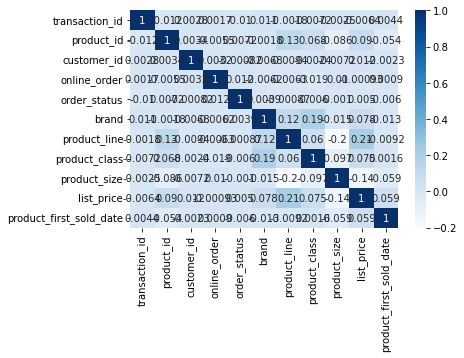

In [39]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

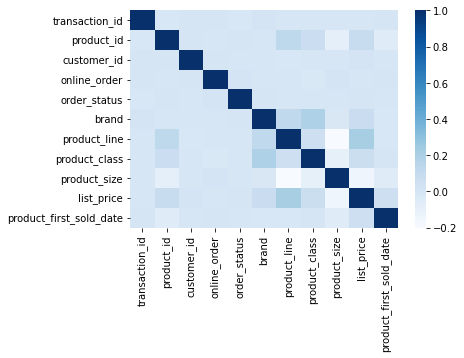

In [43]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues")

In [44]:
corr

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date
transaction_id,1.000000,-0.011633,0.002779,0.001693,-0.010121,0.010935,-0.001814,-0.007154,-0.002507,-0.006391,0.004391
product_id,-0.011633,1.000000,0.003369,-0.005471,0.007236,-0.001761,0.131254,0.068301,-0.086014,0.090085,-0.054155
customer_id,0.002779,0.003369,1.000000,0.003215,-0.000821,-0.006775,-0.009402,-0.002411,-0.007170,0.011671,-0.002306
online_order,0.001693,-0.005471,0.003215,1.000000,0.011923,-0.006177,-0.006316,-0.018633,0.010397,-0.000927,0.000902
order_status,-0.010121,0.007236,-0.000821,0.011923,1.000000,0.003865,-0.000870,-0.005970,-0.001013,0.004996,-0.005966
brand,0.010935,-0.001761,-0.006775,-0.006177,0.003865,1.000000,0.119071,0.188838,-0.014845,0.078194,-0.013414
product_line,-0.001814,0.131254,-0.009402,-0.006316,-0.000870,0.119071,1.000000,0.060073,-0.201128,0.214501,-0.009233
product_class,-0.007154,0.068301,-0.002411,-0.018633,-0.005970,0.188838,0.060073,1.000000,-0.097063,0.074661,0.001593
product_size,-0.002507,-0.086014,-0.007170,0.010397,-0.001013,-0.014845,-0.201128,-0.097063,1.000000,-0.144009,-0.058988
list_price,-0.006391,0.090085,0.011671,-0.000927,0.004996,0.078194,0.214501,0.074661,-0.144009,1.000000,0.059164


In [49]:
dates =df['transaction_date']

In [50]:
dates


0         2/25/17
1         5/21/17
2        10/16/17
3         8/31/17
4         10/1/17
           ...   
19995     6/24/17
19996     11/9/17
19997     4/14/17
19998      7/3/17
19999     9/22/17
Name: transaction_date, Length: 19445, dtype: object

In [51]:
# add 
# dayof week
# month
# day

In [57]:
no_year = []

for i in dates:
    no_year.append(i[:-3])

In [58]:
df['dates'] = no_year

In [60]:
df1 = df.copy()

In [62]:
df1 = df1.drop(columns=['transaction_date'])

In [66]:
date = df1['dates']

In [76]:
days = []
months = []

for i in date:
    if (i[1] == '/'):
        months.append(i[0])
        days.append(i[2:])
    else:
        months.append(i[0:2])
        days.append(i[3:])

In [77]:
days

['25',
 '21',
 '16',
 '31',
 '1',
 '8',
 '21',
 '15',
 '10',
 '30',
 '17',
 '5',
 '26',
 '10',
 '11',
 '10',
 '3',
 '2',
 '6',
 '28',
 '9',
 '29',
 '8',
 '18',
 '11',
 '10',
 '11',
 '23',
 '13',
 '15',
 '5',
 '18',
 '20',
 '28',
 '20',
 '7',
 '9',
 '6',
 '12',
 '28',
 '8',
 '14',
 '17',
 '22',
 '7',
 '20',
 '7',
 '10',
 '17',
 '10',
 '24',
 '27',
 '21',
 '9',
 '18',
 '14',
 '30',
 '14',
 '15',
 '18',
 '24',
 '18',
 '17',
 '8',
 '16',
 '23',
 '3',
 '30',
 '21',
 '6',
 '3',
 '9',
 '23',
 '21',
 '20',
 '10',
 '2',
 '7',
 '12',
 '16',
 '7',
 '27',
 '1',
 '2',
 '13',
 '19',
 '23',
 '6',
 '4',
 '15',
 '15',
 '25',
 '28',
 '23',
 '26',
 '21',
 '31',
 '26',
 '31',
 '27',
 '14',
 '12',
 '12',
 '26',
 '15',
 '22',
 '11',
 '27',
 '4',
 '11',
 '9',
 '7',
 '24',
 '1',
 '21',
 '24',
 '21',
 '20',
 '16',
 '4',
 '1',
 '5',
 '21',
 '3',
 '1',
 '16',
 '26',
 '5',
 '4',
 '18',
 '28',
 '2',
 '9',
 '17',
 '25',
 '2',
 '25',
 '1',
 '22',
 '25',
 '26',
 '20',
 '7',
 '6',
 '25',
 '13',
 '21',
 '21',
 '11',
 '

In [80]:
df1['days'] = days
df1['months'] = months

In [81]:
df1

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,dates,days,months
0,1,2,2950,0,0,3,2,2,1,71.49,$53.62,41245.0,2/25,25,2
1,2,3,3120,1,0,4,2,2,0,2091.47,$388.92,41701.0,5/21,21,5
2,3,37,402,0,0,2,2,1,1,1793.43,$248.82,36361.0,10/16,16,10
3,4,88,3135,0,0,1,2,2,1,1198.46,$381.10,36145.0,8/31,31,8
4,5,78,787,1,0,0,2,2,0,1765.30,$709.48,42226.0,10/1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1,0,2,2,0,1,2005.66,"$1,203.40",37823.0,6/24,24,6
19996,19997,41,127,1,0,3,1,2,1,416.98,$312.74,35560.0,11/9,9,11
19997,19998,87,2284,1,0,2,2,2,1,1636.90,$44.71,40410.0,4/14,14,4
19998,19999,6,2764,0,0,2,2,0,1,227.88,$136.73,38216.0,7/3,3,7


In [82]:
df1 = df1.drop(columns=['dates'])

In [83]:
df1

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,days,months
0,1,2,2950,0,0,3,2,2,1,71.49,$53.62,41245.0,25,2
1,2,3,3120,1,0,4,2,2,0,2091.47,$388.92,41701.0,21,5
2,3,37,402,0,0,2,2,1,1,1793.43,$248.82,36361.0,16,10
3,4,88,3135,0,0,1,2,2,1,1198.46,$381.10,36145.0,31,8
4,5,78,787,1,0,0,2,2,0,1765.30,$709.48,42226.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1,0,2,2,0,1,2005.66,"$1,203.40",37823.0,24,6
19996,19997,41,127,1,0,3,1,2,1,416.98,$312.74,35560.0,9,11
19997,19998,87,2284,1,0,2,2,2,1,1636.90,$44.71,40410.0,14,4
19998,19999,6,2764,0,0,2,2,0,1,227.88,$136.73,38216.0,3,7


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  int8   
 5   order_status             19445 non-null  int8   
 6   brand                    19445 non-null  int8   
 7   product_line             19445 non-null  int8   
 8   product_class            19445 non-null  int8   
 9   product_size             19445 non-null  int8   
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  object 
 12  product_first_sold_date  19445 non-null  float64
 13  dates                    19445 non-null  object 
 14  days                  

In [85]:
df1['days'] = df1['days'].astype(int)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   online_order             19445 non-null  int8   
 4   order_status             19445 non-null  int8   
 5   brand                    19445 non-null  int8   
 6   product_line             19445 non-null  int8   
 7   product_class            19445 non-null  int8   
 8   product_size             19445 non-null  int8   
 9   list_price               19445 non-null  float64
 10  standard_cost            19445 non-null  object 
 11  product_first_sold_date  19445 non-null  float64
 12  days                     19445 non-null  int64  
 13  months                   19445 non-null  object 
dtypes: float64(2), int64(4

In [87]:
df1['months'] = df1['months'].astype(int)

In [88]:
cost = df1['standard_cost']

In [95]:
costs = []

for i in cost:
    costs.append(i[1:])

In [96]:
df1['cost'] = costs

In [103]:
df1 = df1.drop(columns=['standard_cost'])

In [104]:
df1

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date,days,months,cost
0,1,2,2950,0,0,3,2,2,1,71.49,41245.0,25,2,53.62
1,2,3,3120,1,0,4,2,2,0,2091.47,41701.0,21,5,388.92
2,3,37,402,0,0,2,2,1,1,1793.43,36361.0,16,10,248.82
3,4,88,3135,0,0,1,2,2,1,1198.46,36145.0,31,8,381.10
4,5,78,787,1,0,0,2,2,0,1765.30,42226.0,1,10,709.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1,0,2,2,0,1,2005.66,37823.0,24,6,"1,203.40"
19996,19997,41,127,1,0,3,1,2,1,416.98,35560.0,9,11,312.74
19997,19998,87,2284,1,0,2,2,2,1,1636.90,40410.0,14,4,44.71
19998,19999,6,2764,0,0,2,2,0,1,227.88,38216.0,3,7,136.73


<AxesSubplot:>

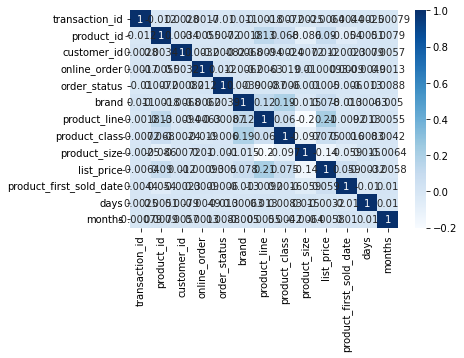

In [109]:
corr = df1.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

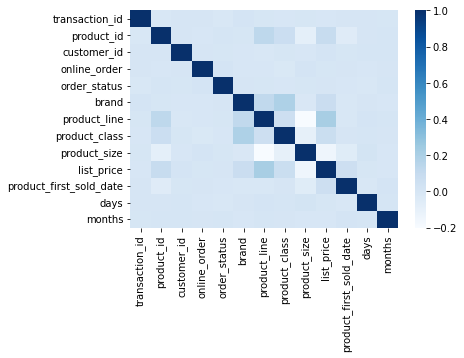

In [108]:
corr = df1.corr()
sns.heatmap(corr, cmap="Blues")

In [112]:
df1.size

272230

In [113]:
df1 = df1.drop_duplicates()

In [114]:
df1.size

272230